# Nehomogénne dielektrické prostredie

Úpravou sústavy rovníc z odvodenia [Yee algoritmu pre 1D prostredie](050_fdtd_yee.ipynb) dostaneme

\begin{align*}
\mu_r \mu_0 \frac{\partial H_y}{\partial t}  &= \frac{\partial E_z}{\partial x} \\
\epsilon_r \epsilon_0 \frac{\partial E_z}{\partial t}  &= \frac{\partial H_y}{\partial x}
\end{align*}

z čoho dostaneme aktualizačné rovnice v tvare

\begin{equation*}
H_y^{q+1/2}[m+1/2] = H_y^{q-1/2}[m+1/2] + \big( E_z^{q}[m+1] - E_z^{q}[m] \big) \frac{S_c}{\mu_r} 
\end{equation*}

\begin{equation*}
E_z^{q+1}[m] = E_z^{q}[m] + \big({H_y^{q + 1/2}[m + 1/2] - H_y^{q+1/2}[m-1/2] } \big) \frac{S_c}{\epsilon_r} 
\end{equation*}

Rozšírenie simulácie o nehomogenity je jednoduché a spočíva v rozšírení o pole hodnôt $\epsilon_r$ (pre dielektrické nehomogenity). V aktualizačných rovniciach príslušnému uzlu pripadíme zodpovedajúcu hodnotu $\epsilon_r$.

    ez[m] = ez[m] + (hy[m] - hy[m - 1]) * z0 * Sc / epsr[m]



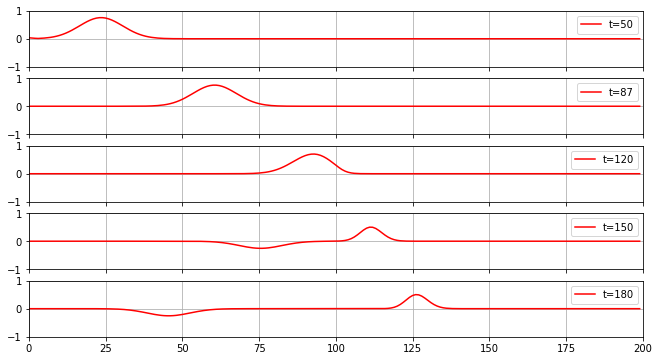

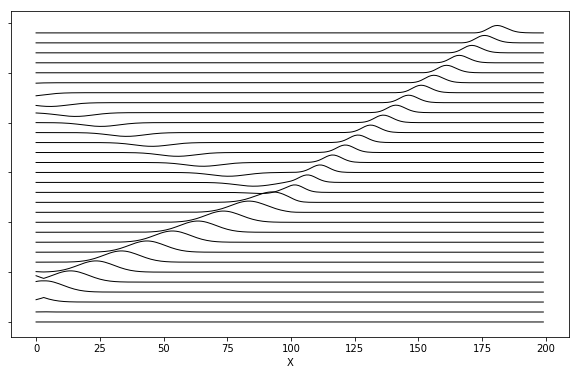

In [1]:
%reset -f 
%matplotlib inline
from scipy import *
import matplotlib.pyplot as plt

nodes = 200
time = 300
ez = zeros(nodes)
hy = zeros(nodes)
epsr = ones(nodes)

for i in range(100,nodes):
    epsr[i] = 4
    
z0 = 377.0
Sc = 1.0

r = zeros((time, nodes))                  # pole vysledkov

for t in range(time):
    ez[0] = ez[1]
    
    for m in range(1,nodes):              # aktualizacia Ez
        ez[m] = ez[m] + (hy[m] - hy[m - 1]) * z0 * Sc / epsr[m]   
        
    ez[3] += exp(-(t - 30.)**2 / 100.)*1.5
    
    for m in range(nodes-1):              # aktualizacia Hy
        hy[m] = hy[m] + (ez[m + 1] - ez[m]) / z0 * Sc
        
    r[t,:] += ez

from utils.utils import *
tm_plot([50, 87, 120, 150, 180], r)
wv_plot(time, nodes, r)    

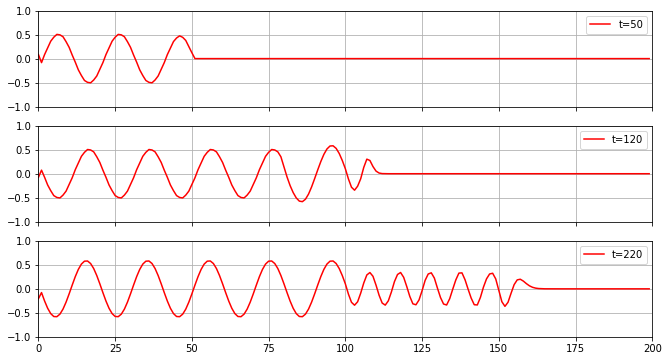

In [4]:
%reset -f 
%matplotlib inline
from scipy import *
import matplotlib.pyplot as plt

nodes = 200
time = 300
ez = zeros(nodes)
hy = zeros(nodes)
epsr = ones(nodes)

for i in range(100,nodes):
    epsr[i] = 4
    
z0 = 377.0
Sc = 1.0

r = zeros((time, nodes))                  # pole vysledkov

for t in range(time):
    ez[0] = ez[1]
    
    for m in range(1,nodes):              # aktualizacia Ez
        ez[m] = ez[m] + (hy[m] - hy[m - 1]) * z0 * Sc / epsr[m]   
        
    #ez[3] += exp(-(t - 30.)**2 / 100.)*1.5
    ez[1] += sin(2*pi*0.05*t)*(1-exp(-t*0.5)) 
    
    for m in range(nodes-1):              # aktualizacia Hy
        hy[m] = hy[m] + (ez[m + 1] - ez[m]) / z0 * Sc
        
    r[t,:] += ez

from utils.utils import *
tm_plot([50, 120, 220], r)
#wv_plot(time, nodes, r)    

## Nejednoznačnosť hranice medzí médiami


## Koeficient odrazu a prechodu

Koeficienty odrazu $\Gamma$ a prechodu $T$ pre elektromagnetickú vlnu prechádzajúcu z prostredia s charakteristickou impedanciou $z_1$ do prostredia s impedanciou sú definované ako

\begin{equation*}
\Gamma = \frac{z_2 - z_1}{z_2 + z_1}
\end{equation*}

\begin{equation*}
T = \frac{2 \, z_2}{z_2 + z_1}
\end{equation*}

V našom prípade pre $z_1 = z_0$,  $z_2 = z_0 / 2$,

\begin{equation*}
\Gamma = \frac{\frac{z_0}{2} - z_0}{\frac{z_0}{2} + z_0} = -\frac{1}{3}
\end{equation*}

\begin{equation*}
T = \frac{2 \, \frac{z_0}{2}}{\frac{z_0}{2} + z_0} = \frac{2}{3}
\end{equation*}